In [63]:
#importar las librerias necesarias, cryptocmd consulta la api de coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

In [64]:
#lee la base de datos desde sql
mysql_cn= MySQLdb.connect(host='localhost',
                              port=3306,user='root',passwd='T3mpora!',
                              db='Cryptos')
df_prices = pd.read_sql('select * from cryptos;', con=mysql_cn)
print 'loaded dataframe from MySQL. records:', len(df_prices)
mysql_cn.close()

loaded dataframe from MySQL. records: 365


In [65]:
df_prices.head()

,timeDate,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
0,2017-06-19,2589.60,370.06,0.296068,NaN,50.32,0.040252,NaN,0.412183,NaN,...,NaN,NaN,NaN,100.67,NaN,NaN,NaN,23.73,NaN,NaN
1,2017-06-20,2721.79,359.00,0.324427,NaN,47.22,0.039366,NaN,0.418494,NaN,...,NaN,NaN,NaN,100.02,NaN,NaN,NaN,21.41,NaN,NaN
2,2017-06-21,2689.10,336.87,0.296366,NaN,47.79,0.038124,NaN,0.413547,NaN,...,NaN,NaN,NaN,93.34,NaN,NaN,NaN,20.01,NaN,NaN
3,2017-06-22,2705.41,336.37,0.297848,NaN,47.71,0.038719,NaN,0.417742,NaN,...,NaN,NaN,NaN,97.76,NaN,NaN,NaN,4.19,NaN,NaN
4,2017-06-23,2744.91,341.74,0.319978,NaN,47.34,0.041397,NaN,0.480910,NaN,...,NaN,NaN,NaN,95.21,NaN,NaN,NaN,4.04,NaN,NaN


In [67]:
#read database from csv
#cryptos = pd.read_csv('./cryptos.csv', sep=',')
#set datetime 
df_prices['timeDate'] =  pd.to_datetime(df_prices['timeDate'])
#set index column
df_prices.set_index('timeDate', inplace = True)
df_prices.head(2)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2017-06-19,2589.60,370.06,0.296068,NaN,50.32,0.040252,NaN,0.412183,NaN,11.72,...,NaN,NaN,NaN,100.67,NaN,NaN,NaN,23.73,NaN,NaN
2017-06-20,2721.79,359.00,0.324427,NaN,47.22,0.039366,NaN,0.418494,NaN,8.00,...,NaN,NaN,NaN,100.02,NaN,NaN,NaN,21.41,NaN,NaN


In [68]:
#explore the dataset
df_prices.describe()

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
count,365.000000,365.000000,365.000000,353.000000,365.000000,365.000000,261.000000,365.000000,279.000000,365.000000,...,208.000000,136.000000,154.000000,365.000000,359.000000,238.000000,293.000000,365.000000,263.000000,351.000000
mean,7694.546466,530.772630,0.610223,6.332198,119.562712,0.197999,0.270347,1.457058,0.040042,55.499726,...,6.854808,2.692059,0.040634,161.572767,3.456147,3.842629,0.459309,3.717836,4.769658,8.398548
std,3900.493454,271.745012,0.549447,5.235025,73.148949,0.188338,0.227634,1.137738,0.035860,39.184745,...,2.773109,1.262060,0.016815,106.302803,1.532857,3.652126,0.337395,2.351454,3.179581,4.399316
min,1929.820000,157.360000,0.148056,0.493225,38.920000,0.010600,0.018539,0.158688,0.001427,5.030000,...,1.540000,1.200000,0.016655,44.270000,0.930694,0.429029,0.035719,1.560000,1.140000,0.694733
25%,4334.680000,300.470000,0.211016,1.400000,53.380000,0.022195,0.119883,0.515205,0.002716,28.330000,...,5.227500,1.687500,0.029114,75.240000,2.365000,0.944118,0.176854,2.260000,2.760000,5.870000
50%,7531.980000,465.850000,0.491931,5.890000,113.160000,0.195862,0.220467,1.180000,0.040014,45.540000,...,6.420000,2.220000,0.037897,120.170000,3.140000,3.085000,0.382213,2.980000,3.670000,7.650000
75%,9654.800000,708.870000,0.825857,10.220000,163.350000,0.333916,0.369709,1.920000,0.058999,75.620000,...,8.432500,3.762500,0.047916,230.570000,4.200000,4.430000,0.646452,4.680000,5.340000,11.065000
max,19497.400000,1396.420000,3.380000,21.540000,358.340000,0.896227,1.110000,5.370000,0.220555,187.410000,...,16.240000,5.960000,0.126760,555.440000,10.020000,20.440000,2.120000,23.730000,16.360000,22.890000


In [69]:
#explore returns
df_prices.select_dtypes(include=['number']).pct_change().describe()

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
count,364.000000,364.000000,364.000000,352.000000,364.000000,364.000000,260.000000,364.000000,278.000000,364.000000,...,207.000000,135.000000,153.000000,364.000000,358.000000,237.000000,292.000000,364.000000,262.000000,350.000000
mean,0.004099,0.002939,0.005562,0.014023,0.004615,0.010596,0.015355,0.007829,0.023652,0.008588,...,0.009782,0.011357,0.013023,0.004406,0.004557,0.012778,0.012586,-0.000740,0.000116,0.013030
std,0.054664,0.063703,0.095192,0.139044,0.076494,0.113897,0.147571,0.101741,0.178316,0.105816,...,0.130548,0.080336,0.216123,0.093079,0.115807,0.133357,0.127668,0.081644,0.099874,0.169012
min,-0.187411,-0.228068,-0.297619,-0.319579,-0.326422,-0.279880,-0.250752,-0.314115,-0.317619,-0.317406,...,-0.656192,-0.162544,-0.270703,-0.368820,-0.385455,-0.244628,-0.575698,-0.790605,-0.223404,-0.313164
25%,-0.025791,-0.028871,-0.036876,-0.047182,-0.037687,-0.045603,-0.049772,-0.051301,-0.056316,-0.052813,...,-0.063237,-0.031894,-0.069942,-0.043324,-0.048667,-0.056306,-0.062085,-0.035850,-0.067069,-0.061044
50%,0.003596,-0.000275,-0.004835,-0.005072,-0.001128,-0.004798,-0.008765,-0.004399,-0.004707,-0.006674,...,-0.004323,0.000000,-0.007745,0.001123,-0.005563,-0.002336,0.002094,0.000000,-0.008043,-0.006163
75%,0.032548,0.034175,0.028940,0.052221,0.032987,0.056826,0.045990,0.058581,0.069415,0.049691,...,0.052502,0.051179,0.060850,0.043278,0.042980,0.057301,0.076817,0.038480,0.065231,0.057657
max,0.252472,0.264569,0.834708,1.683168,0.476004,0.947952,1.366810,0.468085,1.196066,0.663448,...,0.618812,0.394904,2.341241,0.785168,0.648276,0.962264,0.568245,0.288714,0.371542,1.674825


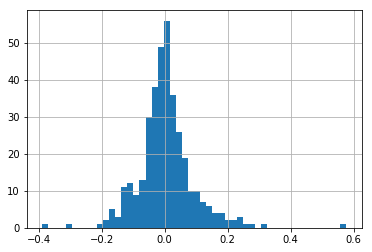

In [70]:
# Plot the distribution of daily returns

df_prices['DOGE'].pct_change().hist(bins=50)
plt.show()

In [71]:
#generate Simple Moving Average matrices for trading strategy
SMA9 = df_prices.rolling(9).mean()
SMA21 = df_prices.rolling(21).mean()

In [73]:
#Difference in SMA, when the shortest SMA is above the other one, its considered a buy signal
DSMA = SMA9 - SMA21

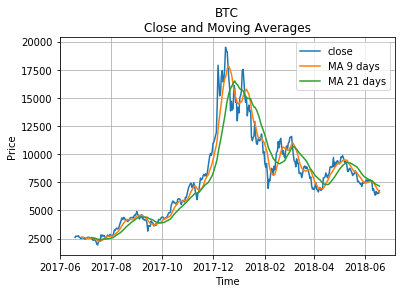

In [74]:
#plot the moving averages and the close price
plt.title('BTC prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, df_prices.BTC, label= 'close')
plt.plot(df_prices.index, SMA9.BTC, label= 'MA 9 days')
plt.plot(df_prices.index, SMA21.BTC, label= 'MA 21 days')
plt.legend(loc='best')
plt.title('BTC\nClose and Moving Averages')
plt.show()

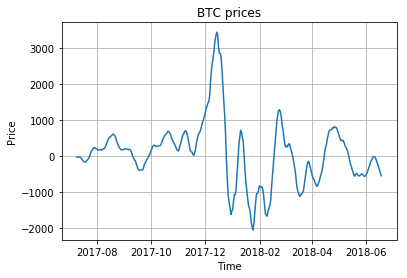

In [75]:
#now we plot the differente in SMA. We buy when it is positive and sell when in becomes negative
plt.title('BTC prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, DSMA.BTC)
plt.show()

In [76]:
DSMA_bool = DSMA.apply(lambda x : x>0)
DSMA_cv = 2*DSMA_bool-1
DSMA_signal = (DSMA_cv.diff())/2

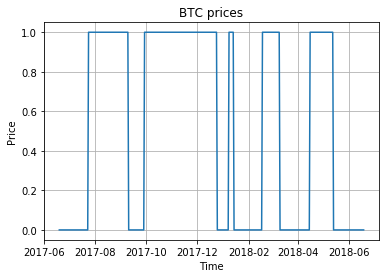

In [77]:
#As above, we hold while it is 1 and sell when it is zero
plt.title('BTC prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, DSMA_bool.BTC)
plt.show()

In [78]:
#returns for the SMA strategy
SMA_returns = DSMA_bool*df_prices.select_dtypes(include=['number']).pct_change()
SMA_returns.tail(2)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-17,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
2018-06-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
SMA_compound_returns = (SMA_returns+1).cumprod()-1

In [80]:
buy_n_hold_compound_returns = (df_prices.select_dtypes(include=['number']).pct_change()+1).cumprod()-1

In [81]:
SMA_compound_returns.tail(3)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-16,3.372057,4.353674,4.7856,12.323371,3.89585,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134
2018-06-17,3.372057,4.353674,4.7856,12.323371,3.89585,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134
2018-06-18,3.372057,4.353674,4.7856,12.323371,3.89585,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134


In [82]:
buy_n_hold_compound_returns.tail(3)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-16,1.529410,0.350159,0.806288,9.524752,0.939189,4.814394,5.526573,1.911328,20.737928,2.259386,...,0.299539,2.048951,0.022232,0.118109,-0.433506,2.449484,2.594953,-0.860936,-0.723502,1.076923
2018-06-17,1.509758,0.352348,0.784104,9.336634,0.909777,4.766297,5.463214,1.838545,20.452716,2.307167,...,0.258065,2.055944,0.001089,0.099036,-0.430052,2.449484,2.474831,-0.860936,-0.725806,1.125506
2018-06-18,1.600718,0.402178,0.815444,9.613861,0.963831,4.822593,5.572830,1.862806,21.684105,2.387372,...,0.294931,2.062937,0.036691,0.136486,-0.445596,2.587464,2.635283,-0.855879,-0.714286,1.145749


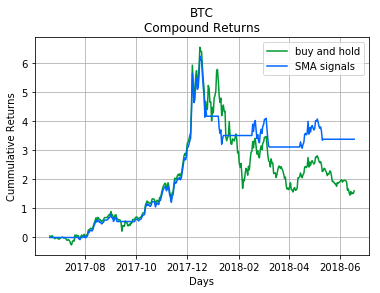

In [83]:
#plot the moving averages and the close price
plt.title('BTC returns')
plt.xlabel('Days')
plt.ylabel('Cummulative Returns')
plt.grid(True)
plt.plot(df_prices.index, buy_n_hold_compound_returns.BTC, label= 'buy and hold', color='#009933')
plt.plot(df_prices.index, SMA_compound_returns.BTC, label= 'SMA signals',color='#0066ff')
plt.legend(loc='best')
plt.title('BTC\nCompound Returns')
plt.show()

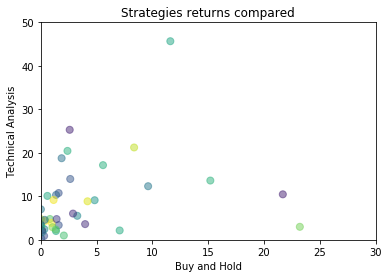

In [104]:
plt.show()
plt.title('Strategies returns compared')
plt.xlabel('Buy and Hold')
plt.ylabel('Technical Analysis')
N=59
x = buy_n_hold_compound_returns.iloc[364]
y = SMA_compound_returns.iloc[364]
colors = np.random.rand(N)
area = 50  # 0 to 15 point radii
plt.xlim(0, 30)
plt.ylim(0, 50)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [137]:
d = {'sma': (SMA_compound_returns.iloc[364]), 'buy_n_hold': (buy_n_hold_compound_returns.iloc[364])}
both = pd.DataFrame(data=d)
both['performance']=both.sma/both.buy_n_hold
both.head(2)

,buy_n_hold,sma,performance
BTC,1.600718,3.372057,2.106590
ETH,0.402178,4.353674,10.825242


In [133]:
SMA_index = DSMA_bool.sum(axis=1)/59
SMA_index = SMA_index.to_frame()
SMA_index.columns = ['prct_index']
SMA_index.describe()

,prct_index
count,365.000000
mean,0.370885
std,0.314694
min,0.000000
25%,0.084746
50%,0.271186
75%,0.661017
max,1.000000


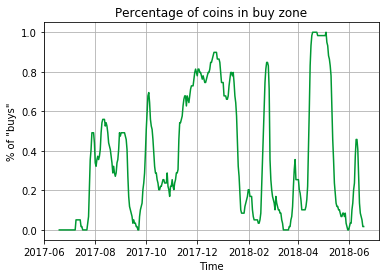

In [139]:
#As above, we hold while it is 1 and sell when it is zero
plt.title('Percentage of coins in buy zone')
plt.xlabel('Time')
plt.ylabel('% of "buys"')
plt.grid(True)
plt.plot(SMA_index.index, SMA_index.prct_index, color='#009933')
plt.show()